<a href="https://colab.research.google.com/github/ra-vb/PCA-with-ANN-Face-recognition-/blob/main/istudio_complete_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: Implementation of PCA with ANN algorithm for Face recognition

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [ ]:
from google.colab import files
import os

print("Please upload your zip file...")
uploaded = files.upload()

Please upload your zip file...


Saving dataset.zip to dataset.zip


In [ ]:
import zipfile
zip_filename = list(uploaded.keys())[0]

# Define the folder where you want to extract the contents
extract_path = "extracted_data"

# Create the directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅ File '{zip_filename}' successfully unzipped to '{extract_path}'.")

✅ File 'dataset.zip' successfully unzipped to 'extracted_data'.


In [ ]:
# The base directory where your images are now located
dir_name = os.path.join(extract_path, "dataset/faces/")

# You can now proceed with your data loading loop
for person_name in os.listdir(dir_name):
    print(f"Loading data for: {person_name}")
    # ... rest of your data loading code

Loading data for: Deepika
Loading data for: Farhan
Loading data for: Akshay
Loading data for: Ileana
Loading data for: Aamir
Loading data for: Amitabh
Loading data for: Disha
Loading data for: Alia
Loading data for: Ajay


# Step 1: Imports and Helper Functions

In [ ]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import numpy as np
import cv2
import os

# Step 2: Data Loading and Preprocessing (No change)

In [ ]:
def plot_gallery(images, titles, h, w, n_row=2, n_col=6):
    """Helper function to plot a gallery of portraits."""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()

# Step 3: Data Loading and Preprocessing

In [ ]:
import cv2
import numpy as np
dir_name = "extracted_data/dataset/faces/"
y = []
target_names = []
person_id = 0
n_samples = 0
class_names = []
X = []

# Assuming the dataset is structured with a folder for each person
for person_name in os.listdir(dir_name):
    print(f"Loading data for: {person_name}")
    class_names.append(person_name)
    dir_path = os.path.join(dir_name, person_name)
    for image_name in os.listdir(dir_path):
        image_path = os.path.join(dir_path, image_name)

        # Read the image
        img = cv2.imread(image_path)

        # Convert into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Resize image to a fixed dimension (e.g., 80x80)
        resized_image = cv2.resize(gray, (80, 80))

        # Convert matrix to vector and flatten
        v = resized_image.flatten()
        X.append(v)

        # Increase the number of samples
        n_samples += 1

        # Add a categorical label
        y.append(person_id)
        target_names.append(person_name)

    # Increase the person id by 1 for the next folder
    person_id += 1

X = np.array(X)
y = np.array(y)
target_names = np.array(target_names)
n_features = X.shape[1]
n_classes = len(class_names)

print(f"Total dataset size: {X.shape}")
print(f"n_samples: {n_samples}")
print(f"n_features: {n_features}")
print(f"n_classes: {n_classes}")


Loading data for: Deepika
Loading data for: Farhan
Loading data for: Akshay
Loading data for: Ileana
Loading data for: Aamir
Loading data for: Amitabh
Loading data for: Disha
Loading data for: Alia
Loading data for: Ajay
Total dataset size: (450, 6400)
n_samples: 450
n_features: 6400
n_classes: 9


# Step 4: Data Splitting

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Step 5: Dimensionality Reduction with PCA

Extracting the top 150 eigenfaces from 337 faces


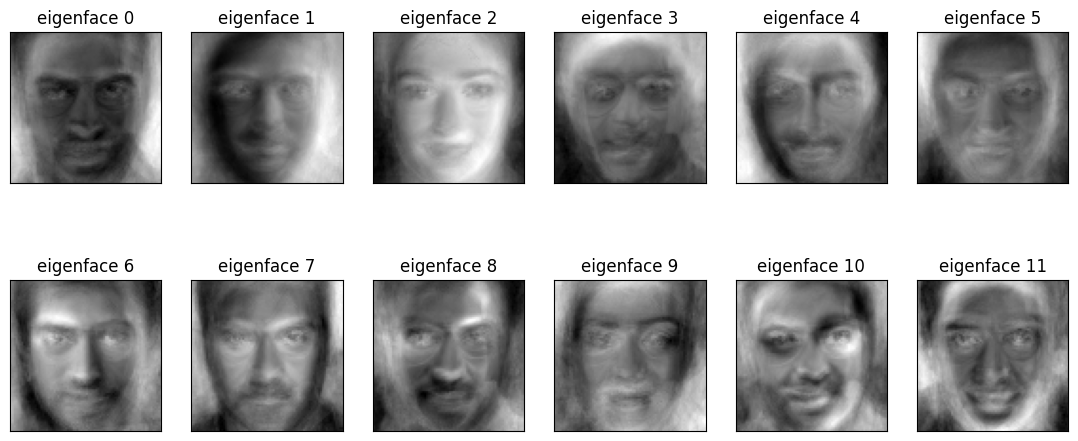

Projecting the input data on the eigenfaces orthonormal basis
X_train_pca shape: (337, 150)
X_test_pca shape: (113, 150)


In [ ]:

n_components = 150
print(f"Extracting the top {n_components} eigenfaces from {X_train.shape[0]} faces")
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, 80, 80))

eigenface_titles = [f"eigenface {i}" for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h=80, w=80)

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")

# Step 6: Training a Multi-Layer Perceptron (MLP) Classifier (Modified)

In [ ]:

print("Training with Multi-Layer Perceptron")
# Increased hidden layers and iterations for better learning
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(200, 100), max_iter=2000, verbose=True).fit(X_train_pca, y_train)

Training with Multi-Layer Perceptron
Iteration 1, loss = 2.38486887
Iteration 2, loss = 2.13343365
Iteration 3, loss = 1.95874967
Iteration 4, loss = 1.80309574
Iteration 5, loss = 1.65712391
Iteration 6, loss = 1.51755540
Iteration 7, loss = 1.38390486
Iteration 8, loss = 1.25332851
Iteration 9, loss = 1.13068980
Iteration 10, loss = 1.01283594
Iteration 11, loss = 0.89885604
Iteration 12, loss = 0.79341682
Iteration 13, loss = 0.69378482
Iteration 14, loss = 0.60276744
Iteration 15, loss = 0.51949249
Iteration 16, loss = 0.44495887
Iteration 17, loss = 0.37843895
Iteration 18, loss = 0.32005228
Iteration 19, loss = 0.27010269
Iteration 20, loss = 0.22587264
Iteration 21, loss = 0.18981266
Iteration 22, loss = 0.15900230
Iteration 23, loss = 0.13372727
Iteration 24, loss = 0.11223229
Iteration 25, loss = 0.09489455
Iteration 26, loss = 0.08049158
Iteration 27, loss = 0.06846842
Iteration 28, loss = 0.05909639
Iteration 29, loss = 0.05111610
Iteration 30, loss = 0.04486611
Iteration 31

# Step 7: Prediction and Visualization (Modified)

Predicting faces on the test set...

Accuracy: 65.4867%


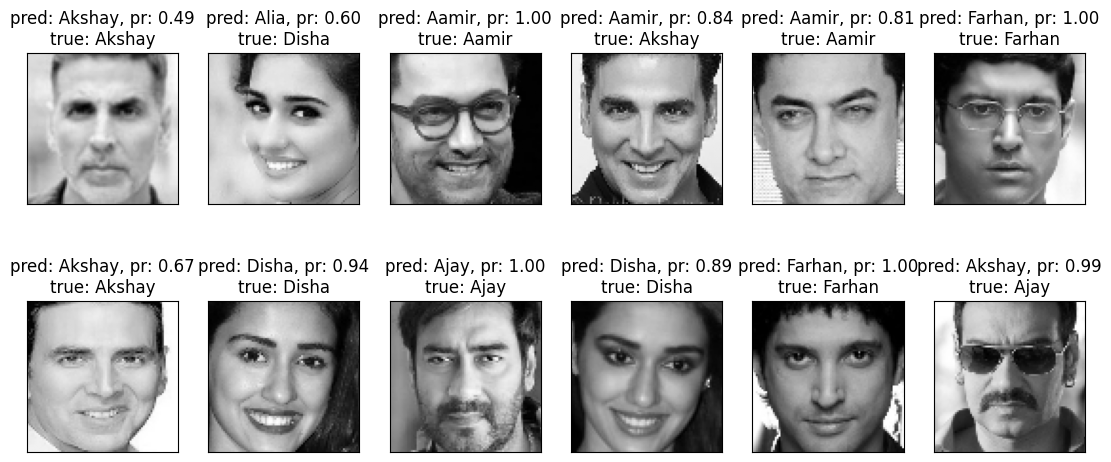

In [ ]:

print("Predicting faces on the test set...")
y_pred = clf.predict(X_test_pca)
predictions_prob = clf.predict_proba(X_test_pca)

true_positive = np.sum(y_pred == y_test)
accuracy = (true_positive / len(y_test)) * 100

print(f"\nAccuracy: {accuracy:.4f}%")

prediction_titles = []
for i in range(y_test.shape[0]):
    # Use class_names for a clean mapping from ID to name
    pred_name = class_names[y_pred[i]]
    true_name = class_names[y_test[i]]
    pred_prob = np.max(predictions_prob[i])
    result = f"pred: {pred_name}, pr: {pred_prob:.2f}\ntrue: {true_name}"
    prediction_titles.append(result)

plot_gallery(X_test, prediction_titles, h=80, w=80)
